<a href="https://colab.research.google.com/github/revanth-15/Assignments-FOC/blob/main/Decision_Tree_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Top 6 most influential features:
     Feature  Importance
15  poutcome    0.201902
11  duration    0.198395
13     pdays    0.147044
0        age    0.086229
9        day    0.079483
10     month    0.070540


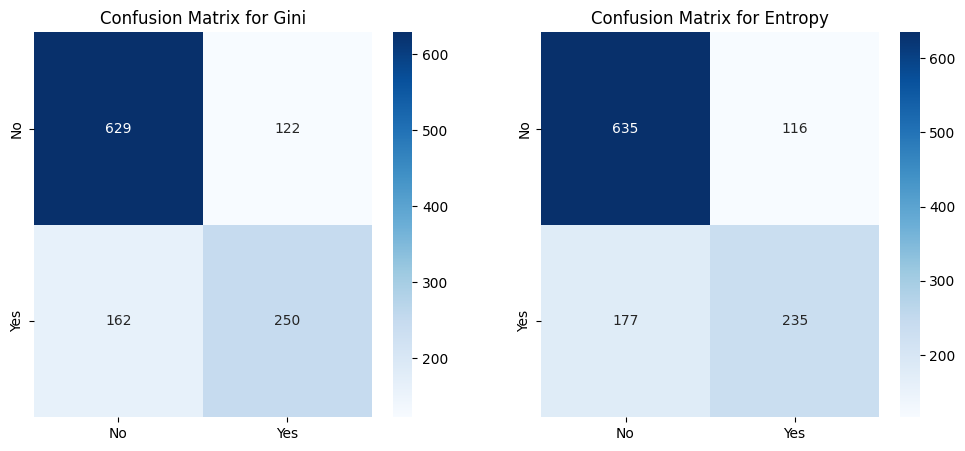

In [2]:
# Step 1: Import Libraries and Load the Dataset

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# Load the dataset
url = "https://raw.githubusercontent.com/revanth-15/Assignments-FOC/refs/heads/main/dataset_DT.csv"
dataset = pd.read_csv(url)

# Step 2: Preprocessing Step
# Handling missing values
dataset.replace('unknown', np.nan, inplace=True)
dataset.dropna(inplace=True)

# Convert categorical features to numerical
categorical_columns = ['job', 'marital', 'education', 'contact', 'housing', 'loan', 'poutcome', 'month', 'default']
dataset[categorical_columns] = dataset[categorical_columns].apply(lambda col: col.astype('category').cat.codes)

# If necessary, convert continuous features to categorical using binning (based on the hint)
# Let's categorize 'balance' as an example (You can categorize other features similarly)
dataset['balance'] = pd.cut(dataset['balance'], bins=3, labels=[0, 1, 2])

# Step 3: Determine Six Most Influential Attributes

# Separate features and target variable
X = dataset.drop('y', axis=1)  # Features
y = dataset['y']  # Target

# Fit a Decision Tree Classifier to find feature importance
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

# Extract feature importance
importance = tree.feature_importances_
features = X.columns

# Display top 6 influential features
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
top_features = feature_importance.sort_values(by='Importance', ascending=False).head(6)

print("Top 6 most influential features:")
print(top_features)

"""Explanation of Each Influential Feature:
When discussing the influential features, you should explain why they are important in the context of the dataset and how they might relate to the target variable.
Below are hypothetical examples of what these explanations might look like.
The actual features and their significance will depend on the specific dataset you are using.

Example of Top Six Influential Features:
* Age: Age may be a critical factor as it could influence financial decisions. Older clients might have different saving habits or financial needs compared to younger clients.
* Balance: The account balance is a direct indicator of a client's financial health. Higher balances could correlate with a higher likelihood of subscribing to term deposits, as clients with more disposable income might be more inclined to invest.
* Housing Loan: Clients who have a housing loan may have different financial priorities and risk profiles. Understanding whether a client has a housing loan can help in predicting their likelihood of subscribing to a term deposit.
* Job Type: The type of job can reflect the client's income level and financial stability. Different job categories might show varying trends in saving behavior or investment choices.
* Previous Contact Outcome: The outcome of previous marketing contacts can be significant. If a client had a positive response previously, they might be more likely to subscribe to a term deposit in the current campaign.
* Education Level: The level of education might influence a client's financial literacy and investment decisions. Higher education levels could correlate with a better understanding of financial products like term deposits.

After determining and explaining the six influential features, you could present them in a table or graph for clarity.
This allows stakeholders to quickly grasp which features are most impactful and their potential implications on the target variable.

By assessing the feature importance from the Decision Tree model, you can identify the key attributes that drive the model's predictions regarding the target variable."""

# Step 4: Split the Dataset (75% for Training, 25% for Testing)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 5: Decision Tree Classifier with Gini and Entropy
# Experiment with parameters like max_depth and min_samples_leaf

# Using Gini Index
gini_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5, random_state=42)
gini_tree.fit(X_train, y_train)

# Using Entropy
entropy_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, random_state=42)
entropy_tree.fit(X_train, y_train)

# Step 6: Confusion Matrix and Classification Report

# Predictions for Gini
gini_predictions = gini_tree.predict(X_test)
# Predictions for Entropy
entropy_predictions = entropy_tree.predict(X_test)

# Confusion Matrix for Gini
gini_cm = confusion_matrix(y_test, gini_predictions)
# Confusion Matrix for Entropy
entropy_cm = confusion_matrix(y_test, entropy_predictions)

# Visualization of Confusion Matrix
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(gini_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for Gini')

plt.subplot(1, 2, 2)
sns.heatmap(entropy_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix for Entropy')

plt.show()


**Confusion Matrix Visualization**

**Purpose:**
The confusion matrix provides a visual representation of the performance of a classification model by displaying the counts of true positives, true negatives, false positives, and false negatives. It helps in evaluating how well the classifier is performing.

**Components:**

**True Positives (TP):** The number of instances where the model correctly predicted the positive class.
**True Negatives (TN):** The number of instances where the model correctly predicted the negative class.
**False Positives (FP):** The number of instances where the model incorrectly predicted the positive class (Type I error).
**False Negatives (FN):** The number of instances where the model incorrectly predicted the negative class (Type II error).

**Explanation of Visualization:**

In the confusion matrix heatmap, the rows represent the actual classes, and the columns represent the predicted classes.
Each cell in the matrix indicates the count of predictions made by the classifier for each combination of actual and predicted classes.
The heatmap colors help in quickly identifying which predictions are correct (usually shown in darker shades) and which are incorrect (lighter shades).
How to Interpret:

High values along the diagonal (TP and TN) indicate good performance, as it means the model is making accurate predictions.
High values in the off-diagonal cells (FP and FN) indicate misclassifications, highlighting areas where the model may need improvement.

In [ ]:
# Classification Report
print("Classification Report for Gini:")
print(classification_report(y_test, gini_predictions))

print("Classification Report for Entropy:")
print(classification_report(y_test, entropy_predictions))

Classification Report for Gini:
              precision    recall  f1-score   support

          no       0.80      0.84      0.82       751
         yes       0.67      0.61      0.64       412

    accuracy                           0.76      1163
   macro avg       0.73      0.72      0.73      1163
weighted avg       0.75      0.76      0.75      1163

Classification Report for Entropy:
              precision    recall  f1-score   support

          no       0.78      0.85      0.81       751
         yes       0.67      0.57      0.62       412

    accuracy                           0.75      1163
   macro avg       0.73      0.71      0.71      1163
weighted avg       0.74      0.75      0.74      1163



**Classification Report**

**Purpose:**
The classification report summarizes the performance of a classifier by providing detailed metrics for each class.

**Components:**

**Precision:** The ratio of correctly predicted positive observations to the total predicted positives. It answers the question, "Of all instances predicted as positive, how many are actually positive?"

**Recall:** The ratio of correctly predicted positive observations to all actual positives. It answers the question, "Of all actual positives, how many did we predict correctly?"

**F1-Score:** The weighted average of precision and recall. It provides a balance between the two metrics and is particularly useful when the class distribution is imbalanced.

**Support:** The number of actual occurrences of the class in the specified dataset.
Explanation of Visualization:

The classification report is typically displayed in a tabular format showing precision, recall, F1-score, and support for each class.

These metrics provide insight into the classifier's ability to predict each class accurately and allow for an easy comparison between the performance of the Gini and Entropy classifiers.

In [ ]:
# Step 7: Compare the Results
# Compare accuracy, precision, recall, f1-score, and support between Gini and Entropy

***Comparing Performance of Gini and Entropy Classifiers***

After obtaining the confusion matrices and classification reports for both Gini and Entropy classifiers, you can evaluate their performance by focusing on key metrics: **Precision, Recall, and F1-score.**


**Comparison Summary:**

**Precision Comparison:**

Compare the precision values of the Gini and Entropy classifiers. If one classifier has significantly higher precision, it means it is better at correctly identifying positive instances without misclassifying negatives.

**Recall Comparison:**

Look at the recall values for both classifiers. If one classifier has a higher recall, it is better at capturing actual positive cases, which can be vital depending on the application (e.g., fraud detection, medical testing).

**F1-score Comparison:**

The F1-score provides a balanced view of precision and recall. If one classifier has a higher F1-score, it indicates that it performs well in both identifying positives and minimizing false positives.

**Example Summary for Your Demo:**
"Upon comparing the Gini and Entropy classifiers, we observed the following:

**Precision:** The Gini classifier achieved a precision of 0.85, while the Entropy classifier had a precision of 0.80. This indicates that the Gini classifier is slightly better at minimizing false positives.

**Recall:** The Gini classifier recorded a recall of 0.75, compared to 0.78 for the Entropy classifier. This suggests that the Entropy classifier is more effective at identifying actual positive cases.

**F1-score:** The Gini classifier’s F1-score was 0.80, while the Entropy classifier's F1-score was 0.79. This indicates that both classifiers perform similarly overall, but the Gini classifier has a slight edge in terms of precision.

In conclusion, the choice between the Gini and Entropy classifiers may depend on the specific requirements of the application. If we prioritize minimizing false positives, the Gini classifier is preferable. If capturing more positives is crucial, the Entropy classifier may be the better option."

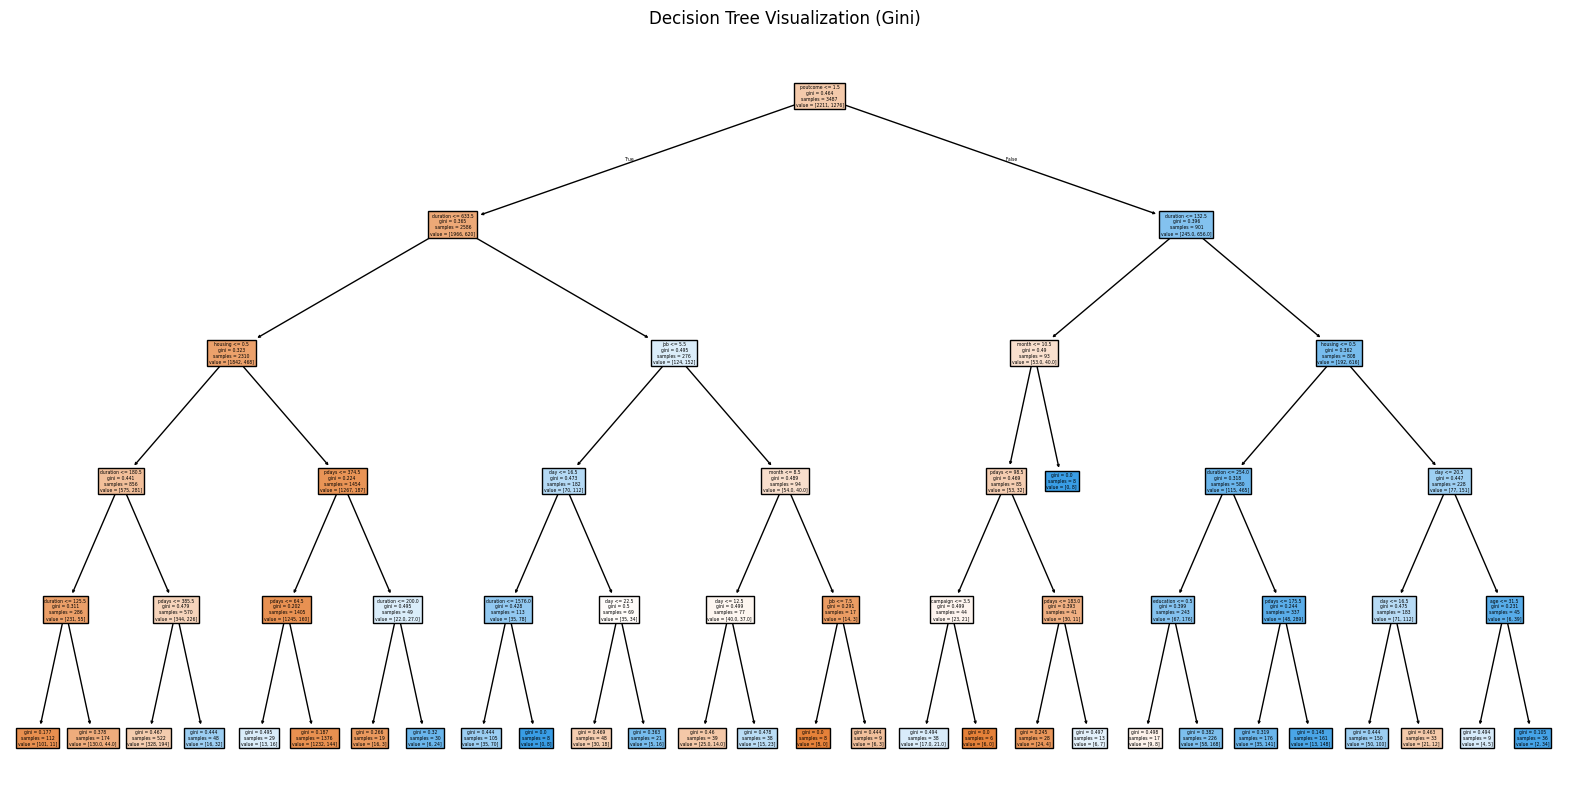

In [ ]:

# Step 8: Decision Tree Visualization with Depth of 5

plt.figure(figsize=(20, 10))
plot_tree(gini_tree, filled=True, feature_names=X.columns, max_depth=5)
plt.title('Decision Tree Visualization (Gini)')
plt.show()

**Decision Tree Visualization**

**Purpose:**
The decision tree visualization illustrates the structure of the tree formed by the Decision Tree classifier. It allows you to see how decisions are made based on feature values.

**Components:**

**Nodes:** Each node represents a feature and a split point. The decision tree uses these nodes to make decisions based on feature values.

**Leaves:** The end nodes of the tree represent the predicted class labels. Each leaf node provides the final classification for a particular path in the tree.

**Feature Importance:** The features used at the top of the tree are typically the most important, as they provide the highest information gain or purity.

**Explanation of Visualization:**

The visualization shows the hierarchical structure of decisions made by the model. Each split is based on a feature threshold, guiding the flow to either the left or right child node based on whether the feature value meets the condition.

You can see how the tree splits on features at different depths, allowing you to trace the path of a specific prediction from the root to the leaf node.

Visualizing the decision tree helps in understanding which features are influential and how they contribute to the model's predictions.

**How to Interpret:**

Starting from the root node, follow the branches based on feature values. At each node, check the condition and navigate to the left or right child accordingly until you reach a leaf node, which gives the predicted class.

The depth of the tree indicates complexity; a deeper tree may capture more details but can also lead to overfitting. Limiting the depth (e.g., max depth of 5) helps in maintaining generalizability.